In [23]:
import pandas as pd
from sqlalchemy import create_engine
import warnings

postgres_user = 'dsbc_student'
postgres_pw = ''
postgres_host = ''
postgres_port = '5432'
postgres_db = 'weatherinszeged'

## House price model

In [24]:
postgres_db='houseprices'
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine2)
engine2.dispose()

In [25]:
# select features  year build, sqfeet , lot area , full bath ,halfbath, overallcond, live area
fea_df = houseprices_df[['yearbuilt','lotarea','fullbath','halfbath','grlivarea','overallcond','saleprice']]

In [26]:
# bath and condition categorical
bath_df = pd.get_dummies(fea_df['fullbath'],dtype=int).rename(columns=lambda x:'fb_' +str(x))
new_df = fea_df.drop(['fullbath'], axis =1).merge(bath_df,left_index=True, right_index=True)

In [27]:
bath_df = pd.get_dummies(fea_df['halfbath'],dtype=int).rename(columns=lambda x:'hb_' +str(x))
new2_df = new_df.drop(['halfbath'], axis =1).merge(bath_df,left_index=True, right_index=True)

In [28]:
new2_df.head()

,yearbuilt,lotarea,grlivarea,overallcond,saleprice,fb_0,fb_1,fb_2,fb_3,hb_0,hb_1,hb_2
0,2003,8450,1710,5,208500,0,0,1,0,0,1,0
1,1976,9600,1262,8,181500,0,0,1,0,1,0,0
2,2001,11250,1786,5,223500,0,0,1,0,0,1,0
3,1915,9550,1717,5,140000,0,1,0,0,1,0,0
4,2000,14260,2198,5,250000,0,0,1,0,0,1,0


In [31]:

# `Y` is the target variable
Y = new2_df['saleprice']
# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X = new2_df.drop(['saleprice'], axis =1)

In [33]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [34]:
import statsmodels.api as sm

# You need to manually add a constant
X_train = sm.add_constant(X_train)
# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     289.8
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          3.08e-289
Time:                        16:12:48   Log-Likelihood:                -14137.
No. Observations:                1168   AIC:                         2.829e+04
Df Residuals:                    1158   BIC:                         2.834e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.689e+06   7.03e+04    -24.041      

This model's F-statistic is 369.4, and the associated p-value is very close to zero. This means that your features add some information to the reduced model, and your model is useful in explaining house prices.
AIC/BIC IS QUITE BIG , WE MAY NEED TO SELECT MORE FEATURES TO GET BETTER MODEL 
R SQARE IS .696 , MODEL IS SOME WHAT EXPLAINING THE HOUSE PRICE , ADDING OTHER VARIABLES MIGHT IMPROVE PERFORMANCE

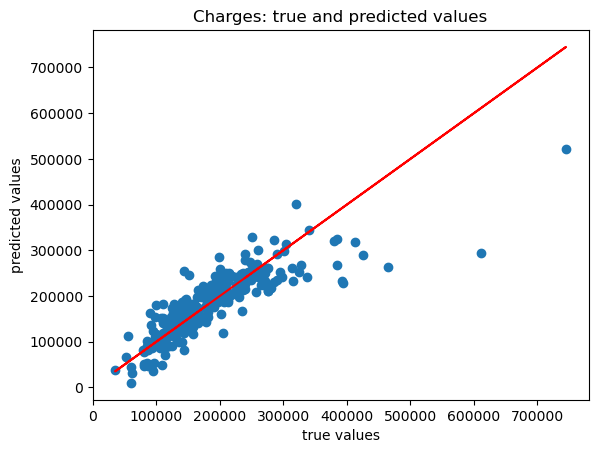

Mean absolute error of the prediction is: 28069.088761753832
Mean squared error of the prediction is: 1961176608.560887
Root mean squared error of the prediction is: 44285.17368782567
Mean absolute percentage error of the prediction is: 15.73929590479092


In [36]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine, text
# Add a constant to the model because it's best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# You are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

